In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import ALookAtTheData as t
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [116]:
#find number of rows and columns in dataframe
df.shape

(88883, 85)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [118]:
#find number of columns with no null values
no_nulls=set(df.columns[df.isnull().sum()==0])
no_nulls

{'Hobbyist', 'OpenSourcer', 'Respondent'}

In [119]:
#columns with sum of missing values
df.isnull().sum()

Respondent            0
MainBranch          552
Hobbyist              0
OpenSourcer           0
OpenSource         2041
Employment         1702
Country             132
Student            1869
EdLevel            2493
UndergradMajor    13269
EduOther           4623
OrgSize           17092
DevType            7548
YearsCode           945
Age1stCode         1249
YearsCodePro      14552
CareerSat         16036
JobSat            17895
MgrIdiot          27724
MgrMoney          27726
MgrWant           27651
JobSeek            8328
LastHireDate       9029
LastInt           21728
FizzBuzz          17539
JobFactors         9512
ResumeUpdate      11006
CurrencySymbol    17491
CurrencyDesc      17491
CompTotal         32938
                  ...  
Containers         3517
BlockchainOrg     40708
BlockchainIs      28718
BetterLife         2614
ITperson           1742
OffOn              2220
SocialMedia        4446
Extraversion       1578
ScreenName         8397
SOVisit1st         5006
SOVisitFreq     

In [122]:
#drop all rows with null values for column MainBranch
df_new=df.dropna(subset=['MainBranch'],axis=0)

In [123]:
#number of rows and columns in new dataframe
df_new.shape

(88331, 85)

In [128]:
#find counts for each value
prof=df_new.MainBranch.value_counts()
prof

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

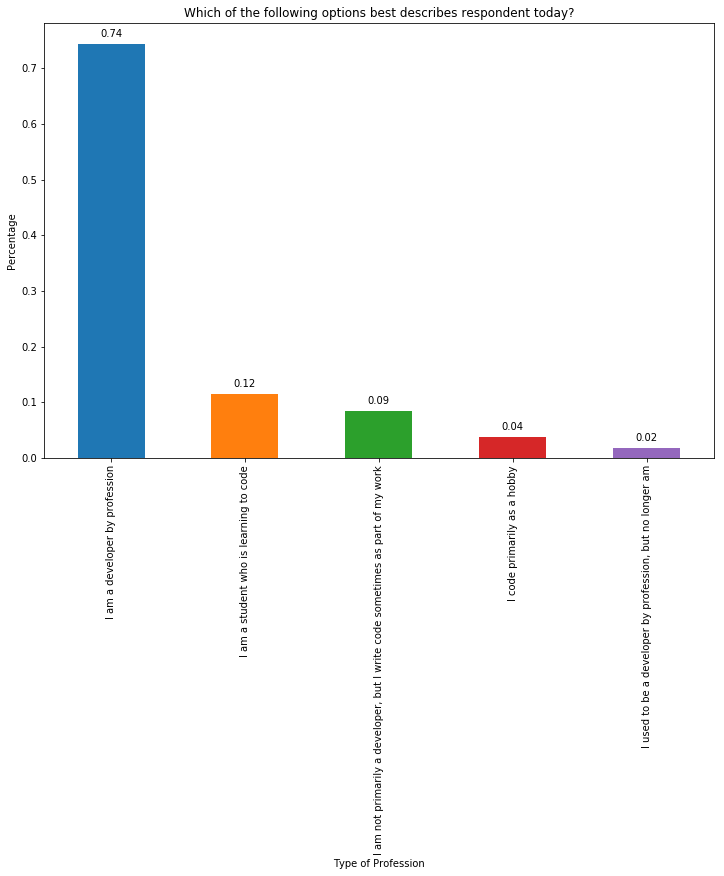

In [136]:
#Plot the bar graph  for MainBranch column
plt.figure(figsize=(12, 8))
ax = (prof/df_new.shape[0]).plot(kind="bar")
ax.set_title("Which of the following options best describes respondent today?")
ax.set_xlabel('Type of Profession')
ax.set_ylabel('Percentage')
#ax.set_xticklabels(ax)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
       # Invert space to place label below
       space *= -1
       # Vertically align label at top
       va = 'top'
            
    label = "{:.2f}".format(y_value)
    ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0,space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                      


In [137]:
#Find whether respondent is Hobbyist or not
code_as_hobby=df_new.Hobbyist.value_counts()
code_as_hobby

Yes    70962
No     17369
Name: Hobbyist, dtype: int64

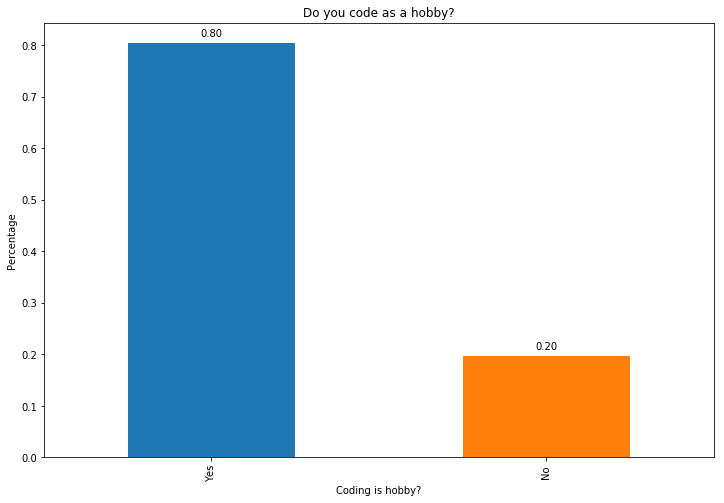

In [139]:
#Plot the bar graph for Hobbyist column
plt.figure(figsize=(12, 8))
ax = (code_as_hobby/df_new.shape[0]).plot(kind="bar")
ax.set_title("Do you code as a hobby?")
ax.set_xlabel('Coding is hobby?')
ax.set_ylabel('Percentage')
#ax.set_xticklabels(ax)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
       # Invert space to place label below
       space *= -1
       # Vertically align label at top
       va = 'top'
            
    label = "{:.2f}".format(y_value)
    ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0,space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                      


In [108]:
#df_new=df_new.replace({'Hobbyist':{'Yes':1,'No':0}})

In [140]:
#How often do you contribute to open source?
is_open_sourcer=df_new.OpenSourcer.value_counts()
is_open_sourcer

Never                                                 32051
Less than once per year                               24857
Less than once a month but more than once per year    20484
Once a month or more often                            10939
Name: OpenSourcer, dtype: int64

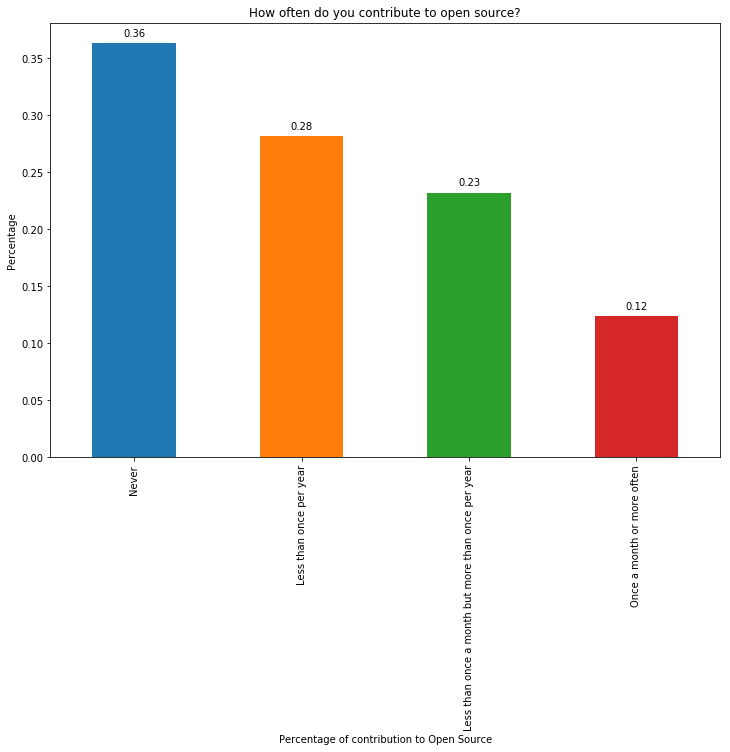

In [141]:
#Plot the bar graph for OpenSourcer column
plt.figure(figsize=(12, 8))
ax = (is_open_sourcer/df_new.shape[0]).plot(kind="bar")
ax.set_title("How often do you contribute to open source?")
ax.set_xlabel('Percentage of contribution to Open Source')
ax.set_ylabel('Percentage')
#ax.set_xticklabels(ax)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
       # Invert space to place label below
       space *= -1
       # Vertically align label at top
       va = 'top'
            
    label = "{:.2f}".format(y_value)
    ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0,space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                      


In [111]:
#df_new=df_new.replace({'OpenSourcer':{'Never':1,'Less than once per year':2,'Less than once a month but more than once per year':3,
 #                                   'Once a month or more often':4}})

In [142]:
#In which country respondent currently reside?
count_vals=df_new.Country.value_counts()
count_vals[:10]

United States     20877
India              9035
Germany            5838
United Kingdom     5702
Canada             3377
France             2386
Brazil             1938
Poland             1918
Australia          1895
Netherlands        1845
Name: Country, dtype: int64

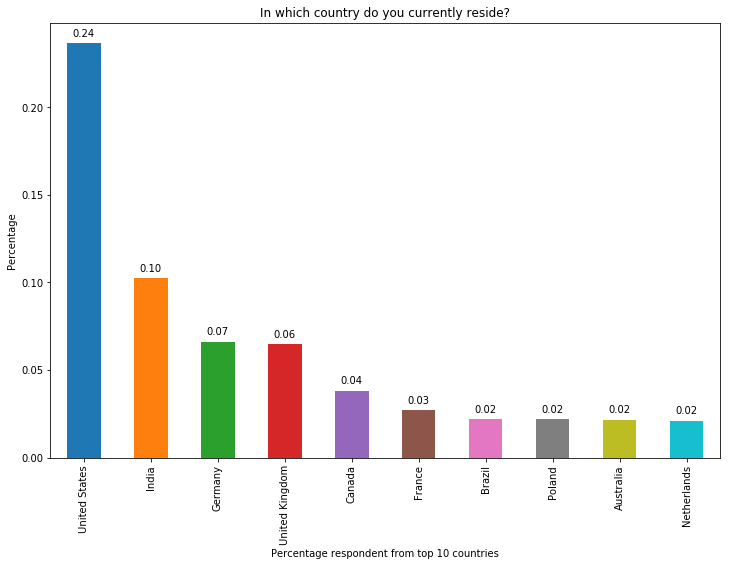

In [143]:
#Plot the bar graph for Country column
plt.figure(figsize=(12, 8))
ax = (count_vals[:10]/df_new.shape[0]).plot(kind="bar")
ax.set_title("In which country do you currently reside?")
ax.set_xlabel('Percentage respondent from top 10 countries')
ax.set_ylabel('Percentage')
#ax.set_xticklabels(ax)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
       # Invert space to place label below
       space *= -1
       # Vertically align label at top
       va = 'top'
            
    label = "{:.2f}".format(y_value)
    ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0,space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                      

In [144]:
df_new['LanguageWorkedWith']=df_new['LanguageWorkedWith'].str.split(';',expand=False)
#type(lang)

C:\Users\punam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
df_new['LanguageWorkedWith'].head(5)

0                 [HTML/CSS, Java, JavaScript, Python]
1                              [C++, HTML/CSS, Python]
2                                           [HTML/CSS]
3                            [C, C++, C#, Python, SQL]
4    [C++, HTML/CSS, Java, JavaScript, Python, SQL,...
Name: LanguageWorkedWith, dtype: object

In [61]:
# Create the dictionary 
#from sklearn.preprocessing import MultiLabelBinarizer

#mlb = MultiLabelBinarizer()
#df_new = df_new.join(pd.DataFrame(mlb.fit_transform(df_new.pop('LanguageWorkedWith')),
 #                         columns=mlb.classes_,
  #                        index=df_new.index))
df_new=df_new.join(df_new.LanguageWorkedWith.str.join('|').str.get_dummies())



In [62]:
df_new.shape

(55945, 113)

In [63]:
df_new.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly
2,3,"I am not primarily a developer, but I write co...",1,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,0,0,0,0,0,0,0,0,0,0
3,4,I am a developer by profession,0,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,1,0,0,0,1,0,0,0,0,0
5,6,"I am not primarily a developer, but I write co...",1,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,0,1,0,0,1,0,0,0,0,0


In [64]:
#(df_new[df['Python','R']].sum()/df_new.shape[0]).plot(kind=bar)
lang=df_new.iloc[:,85:].sum().sort_values(ascending=False)

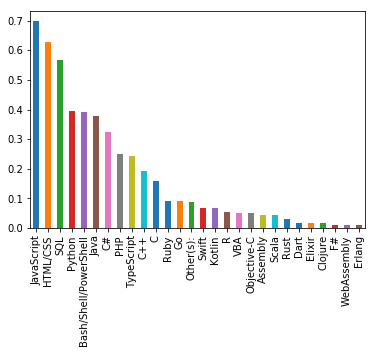

In [65]:
(lang/df_new.shape[0]).plot(kind='bar')

In [68]:
df_new.Student.value_counts()

No                47292
Yes, full-time     5037
Yes, part-time     3265
Name: Student, dtype: int64

In [69]:
df_new.Student.isnull().sum()

351

In [34]:
#df_new=df_new.replace({'Student':{'No':1,'Yes, full-time':2,'Yes, part-time':3}})


In [70]:
df_new.DevType.isnull().sum()

748

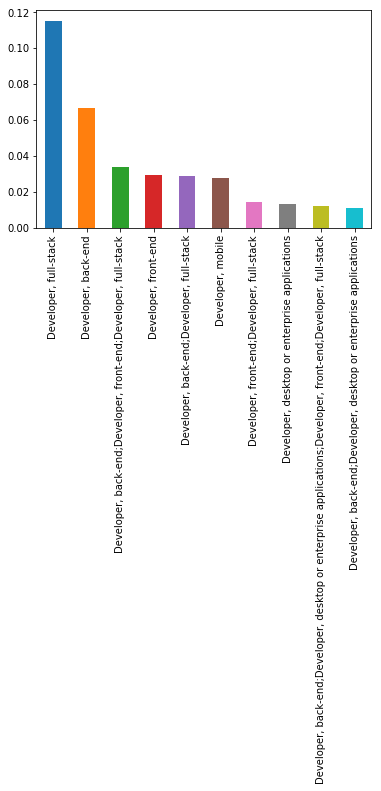

In [71]:
dev_role=df_new.DevType.value_counts()
(dev_role[:10]/df_new.shape[0]).plot(kind='bar')

In [73]:
df_new.MainBranch.value_counts()

1    50610
3     5335
Name: MainBranch, dtype: int64

In [72]:
df_new=df_new.replace({'MainBranch':{'I am a developer by profession':1,'I am a student who is learning to code':2,
                                     'I am not primarily a developer, but I write code sometimes as part of my work':3,
                                    'I code primarily as a hobby':4, 'I used to be a developer by profession, but no longer am':5}})

In [35]:
df_new.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly
0,1,2,1,1,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,1.0,Primary/elementary school,NaN,...,1,0,0,0,0,0,0,0,0,0
1,2,2,0,2,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,2.0,"Secondary school (e.g. American high school, G...",NaN,...,1,0,0,0,0,0,0,0,0,0
2,3,3,1,1,The quality of OSS and closed source software ...,Employed full-time,Thailand,1.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_new=df_new.dropna(subset=['CompTotal'],axis=0)

In [39]:
df_new.shape

(55945, 113)

In [40]:
df_new.isnull().sum()

Respondent                  0
MainBranch                  0
Hobbyist                    0
OpenSourcer                 0
OpenSource                807
Employment                142
Country                     0
Student                   351
EdLevel                   833
UndergradMajor           4568
EduOther                 1651
OrgSize                  1011
DevType                   748
YearsCode                  88
Age1stCode                148
YearsCodePro              168
CareerSat                   0
JobSat                     57
MgrIdiot                 8124
MgrMoney                 8136
MgrWant                  8101
JobSeek                     0
LastHireDate               52
LastInt                  3416
FizzBuzz                  454
JobFactors                181
ResumeUpdate              782
CurrencySymbol              0
CurrencyDesc                0
CompTotal                   0
                         ... 
SurveyLength              410
SurveyEase                336
Assembly  